<a href="https://colab.research.google.com/github/gauravkinhikar97/Netflix-Movies-and-TV-Shows-recommendation/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 


NETFLIX MOVIES AND TV SHOWS CLUSTERING

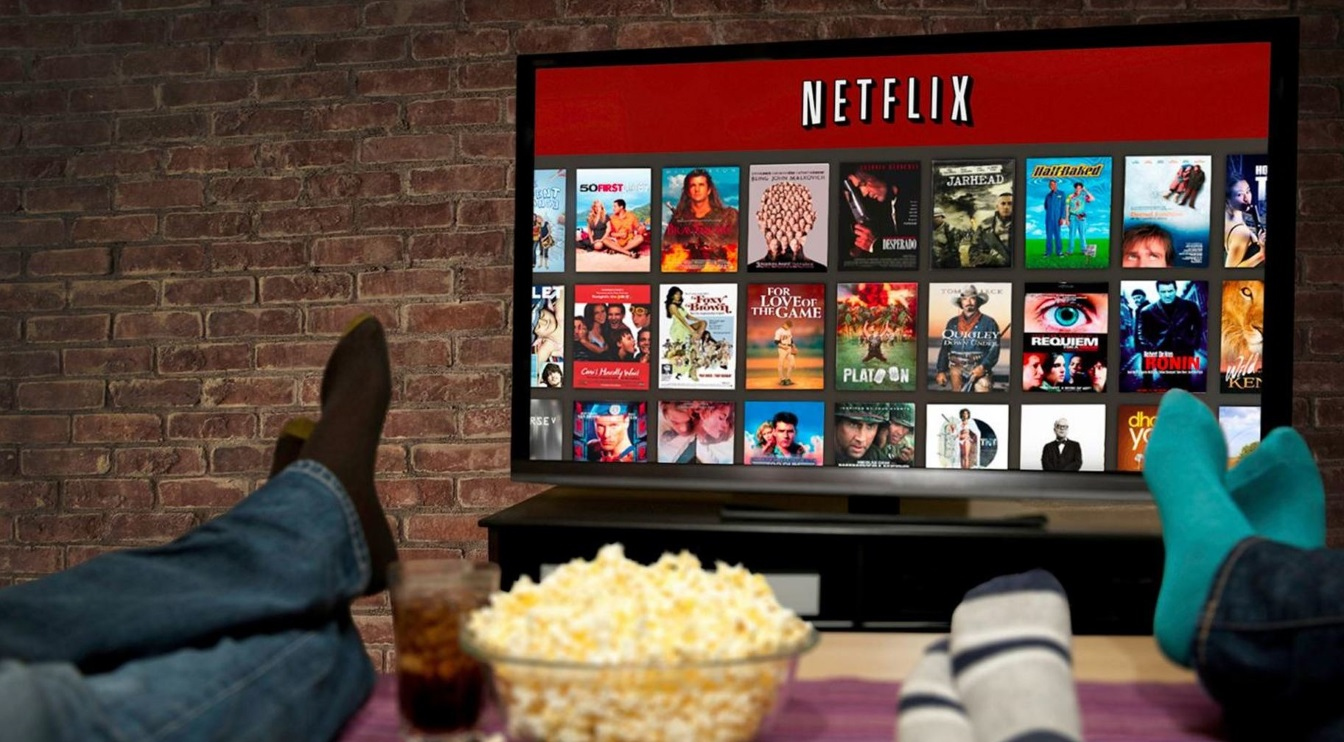

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member Name-**    - Gaurav Kinhikar


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attributes' Information**

1. show_id : Unique ID for every Movie / Tv Show
2. type : Identifier - A Movie or TV Show
3. title : Title of the Movie / Tv Show
4. director : Director of the Movie
5. cast : Actors involved in the movie / show
6. country : Country where the movie / show was produced
7. date_added : Date it was added on Netflix
8. release_year : Actual Releaseyear of the movie / show
9. rating : TV Rating of the movie / show
10. duration : Total Duration - in minutes or number of seasons
11. listed_in : Genere
12. description: The Summary description

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm
import plotly.graph_objects as go
import plotly.offline as py

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Important packages for data cleaning 
import string

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset
data= pd.read_csv('/content/drive/MyDrive/netflix/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
data_df = data.copy()
data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset First View

In [4]:
# Dataset First Look
pd.set_option('display.max_columns', None)
data_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# checking the shape of the dataset
data_df.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# changing the data type of the date column from object to datetime
data_df['date_added']=pd.to_datetime(data_df['date_added'])

In [9]:
# rechecking the data types of the attributes after changes.
# Dataset Info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [10]:
data_df.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
data_df.duplicated().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
data_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

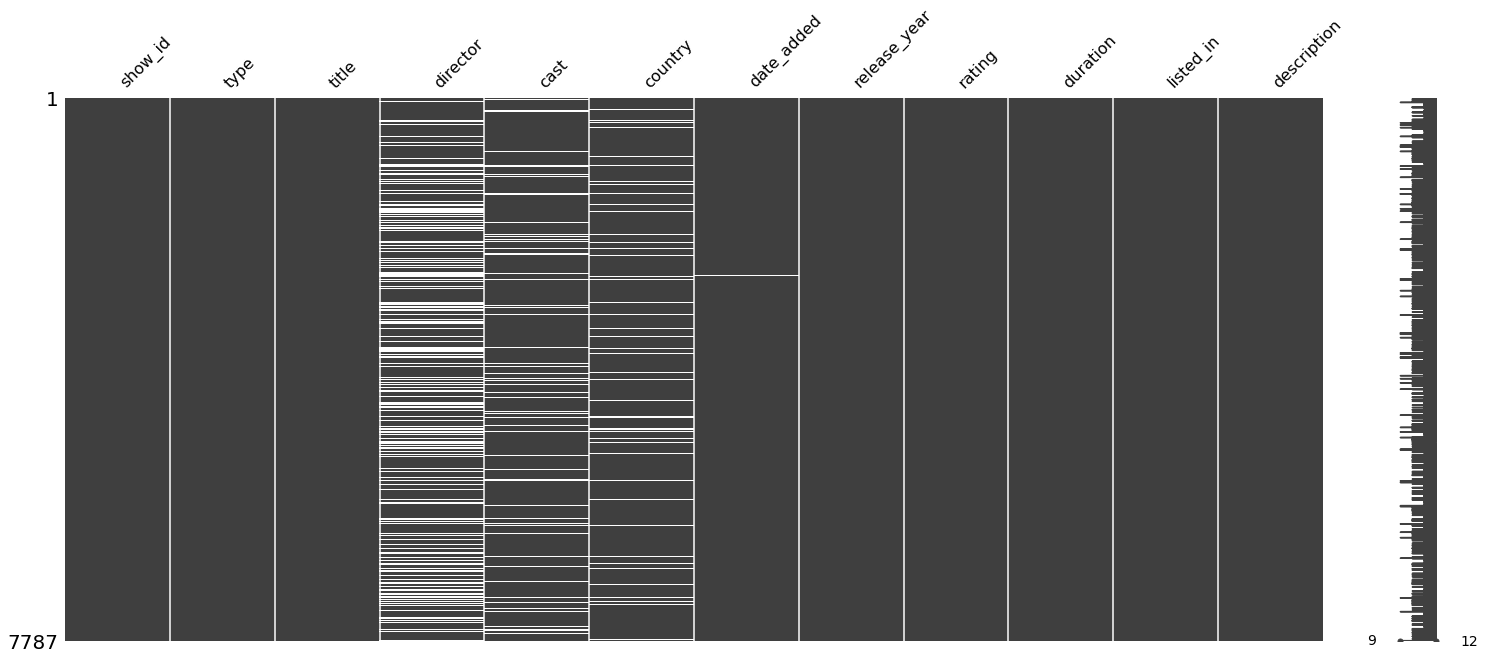

In [14]:
import missingno as msno
# Visualize missing values as a matrix
msno.matrix(data_df)

### What did you know about your dataset?

As we can see here **director,cast,country,rating** and **date_added** are the features with null values present in it so , I has treated this null values 

As we can see director features there is almost 2389 null values present and also these cast feature had 718 null values so i replace this features values with no director and no cast 

In [16]:
data_df['director'].fillna('no director',inplace=True)
data_df['cast'].fillna('no cast',inplace=True)

In [17]:
# Missing Values/Null Values Count
data_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [18]:
data_df.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

As we have see here united states has the highest viewers in our dataset so we will replace null values with this values, so it does not affects on our dataset

In [19]:
# replacing NaN values with (mostly present value in country feature) value which is  'United States'
data_df['country'].replace(np.nan, 'United States',inplace  = True)

In [20]:
data_df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

As we can see here TV-MA has the highest rating in our dataset so we will replace null values with this values, so it does not affects on our dataset

In [21]:
# replacing NaN with mode(mostly present value in rating feature) value which is  'TV-MA  '
data_df['rating'].replace(np.nan, 'TV-MA ',inplace  = True) 

In [23]:
#checking date added feature null values
data_df.isnull().sum().date_added

10

we can see here there ae only 10 null values present here so I prefer to fill with zero values 

In [25]:
data_df.dropna(subset=['date_added'],inplace=True)

In [26]:
data_df.isnull().sum().date_added

0

In [27]:
# rechecking the attributes that still if there are any null values in each attribute
data_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

SO, I have successfully remove NaN values in the datasets 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns after preprocessing
data_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
data_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Check Unique Values for each variable.

In [28]:
# Check Unique Values for each variable.
data_df.nunique()

show_id         7787
type               2
title           7787
director        4050
cast            6832
country          681
date_added      1513
release_year      73
rating            15
duration         216
listed_in        492
description     7769
dtype: int64

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Type 

In [ ]:
#checking and counting categorical values in type feature
data_df.value_counts('type')

type
Movie      5377
TV Show    2410
dtype: int64

In [ ]:
#checking percentage wise type feature
data_df['type'].value_counts(normalize = True)*100

Movie      69.050982
TV Show    30.949018
Name: type, dtype: float64

In [ ]:
#creating fun for type feature visualise in donut chart
def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels,values=values,title=title,hoverinfo='percent+value', 
                   textinfo='percent',textposition='inside',hole=0.7,showlegend=True,
                   marker=dict(colors=colors,line=dict(color='#000000',width=2)))
    return trace


py.iplot([pie_plot(data_df['type'].value_counts(), ['maroon', 'Red'], 'Content Type')])

**Type wise rating**

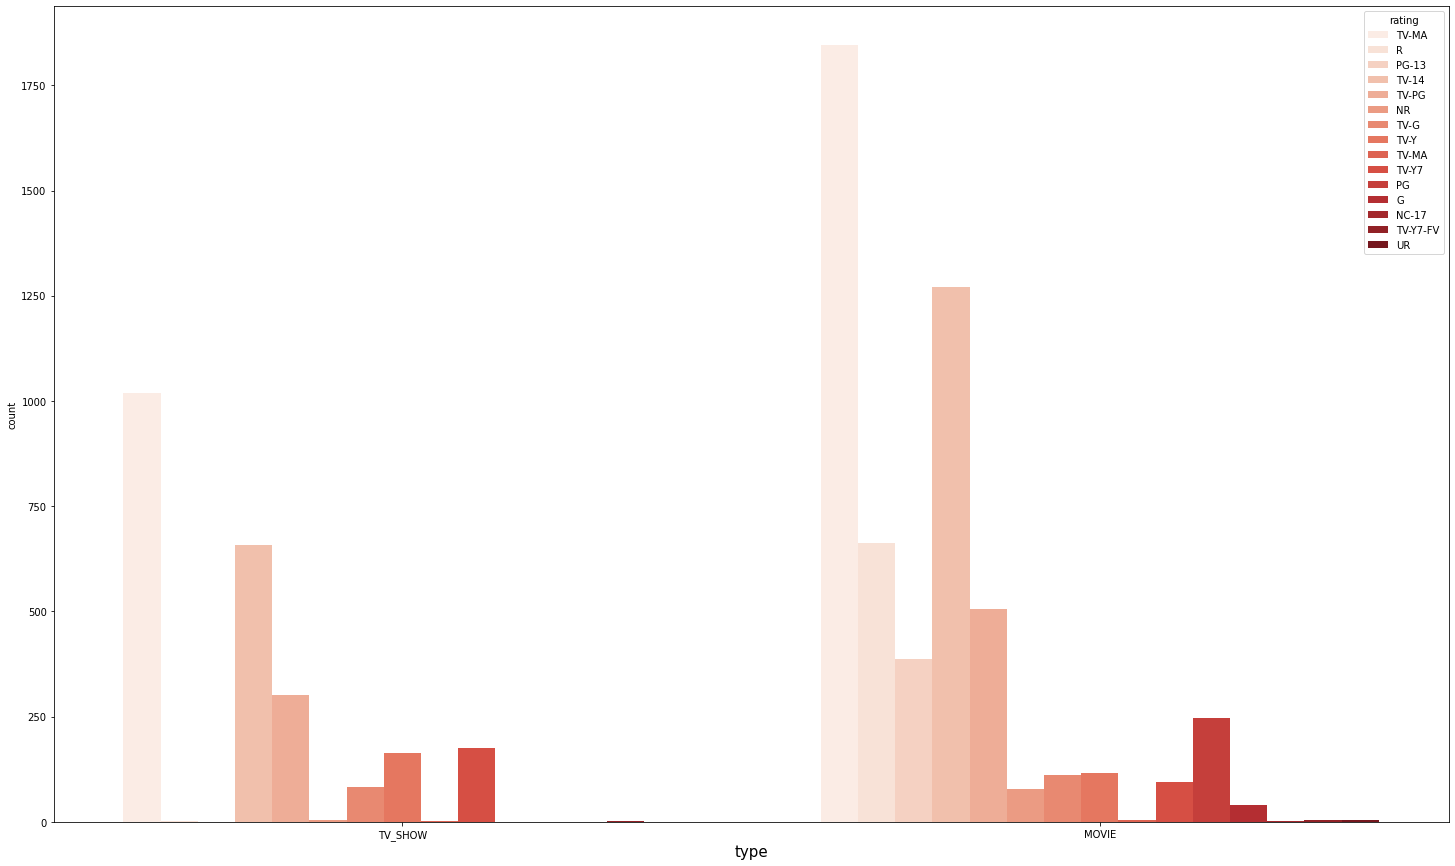

In [ ]:
# It shows type wise rating
sns.countplot(x=data_df['type'],hue=data_df['rating'],palette ='Reds')
plt.xticks(ticks=range(2),labels=['TV_SHOW','MOVIE'])
plt.xlabel('type',fontdict={'size':15})
plt.rcParams['figure.figsize'] = (25, 15)

##### 1. Why did you pick the specific chart?

1. Donut chart shows percentage criteria for types 
2. Bar charts shows Every type wise ratings 

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

a

#### Chart - 2. country 

In [ ]:
data_df.country.value_counts()

United States                                                   3062
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
data_df.country.value_counts().nunique()

46

In [ ]:
data_df['country'].value_counts(normalize = True)*100

United States                                                   39.321947
India                                                           11.853088
United Kingdom                                                   5.098241
Japan                                                            2.902273
South Korea                                                      2.350071
                                                                  ...    
Russia, United States, China                                     0.012842
Italy, Switzerland, France, Germany                              0.012842
United States, United Kingdom, Canada                            0.012842
United States, United Kingdom, Japan                             0.012842
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands     0.012842
Name: country, Length: 681, dtype: float64

<AxesSubplot:title={'center':'country'}>

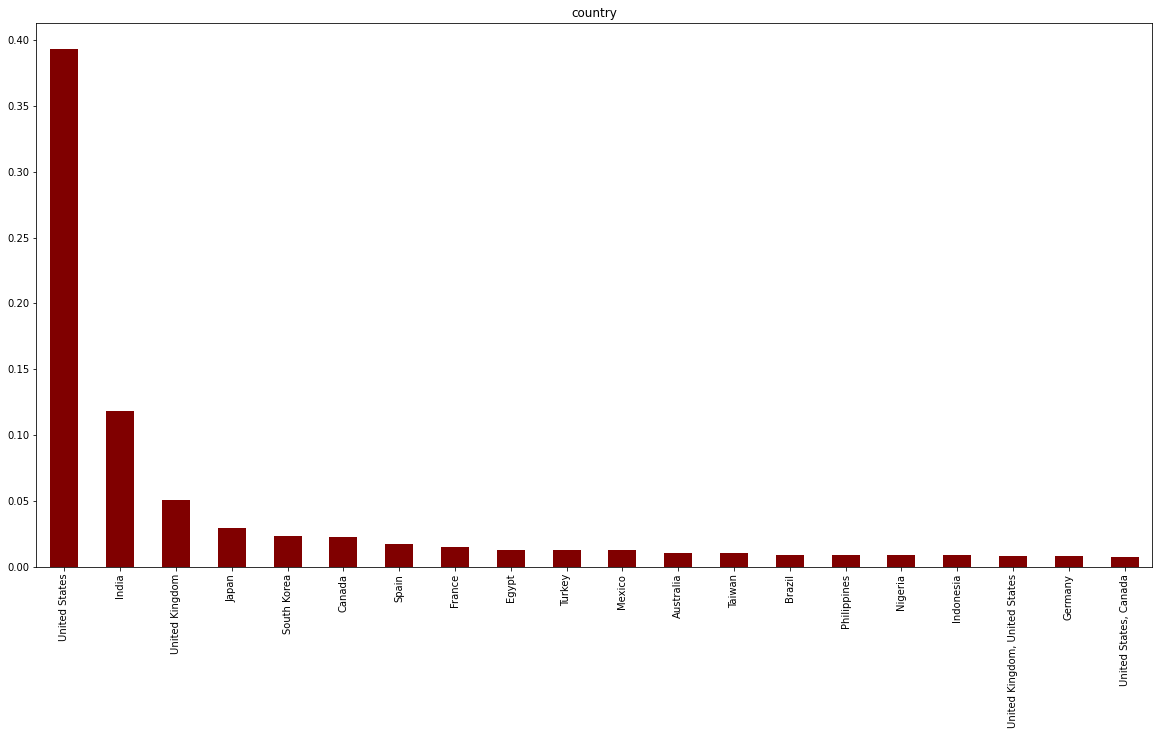

In [ ]:
data_df['country'].value_counts(normalize = True)[:20].plot.bar(title='country',color = 'maroon',figsize=(20,10))

In [ ]:
country = data_df['country'].value_counts().reset_index()

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'magenta', width = 1)))
fig.show()

Text(0.5, 1.0, ' Most watched Country wise movies')

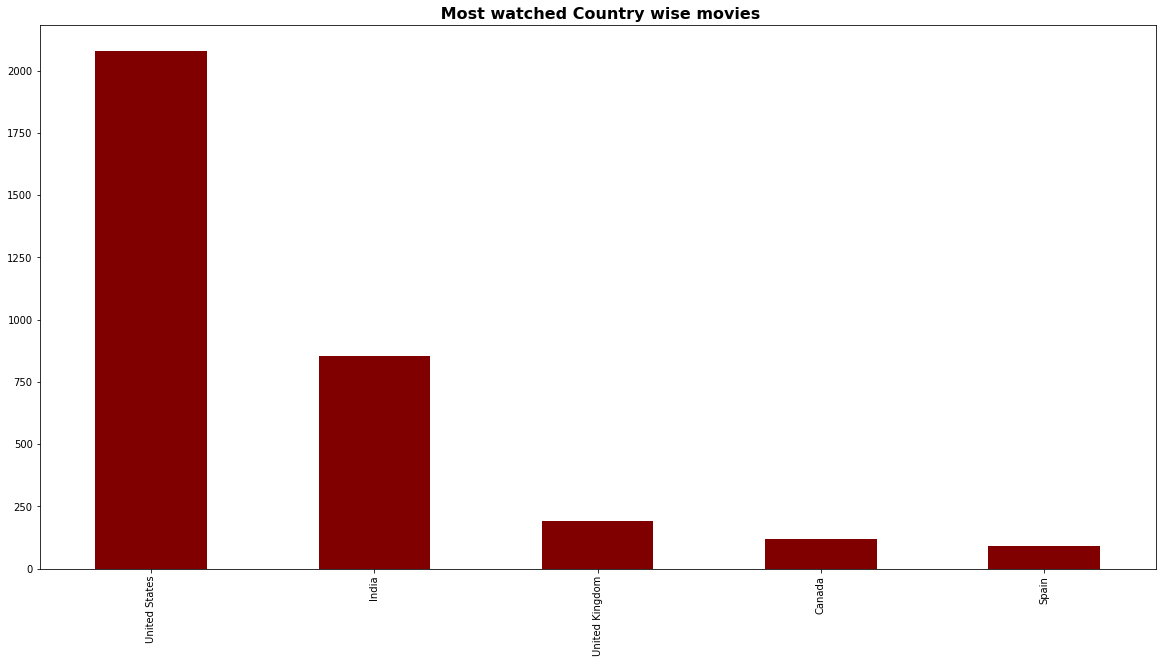

In [ ]:
top5_countries = (data_df[data_df['type']=='Movie']['country'].value_counts()[:5])
my_colors = 'maroon' 
top5_countries.plot(kind='bar',color=my_colors,figsize=(20,10))
plt.title(' Most watched Country wise movies',size='16',fontweight="bold")

Text(0.5, 1.0, '  Most watched Country wise TV show')

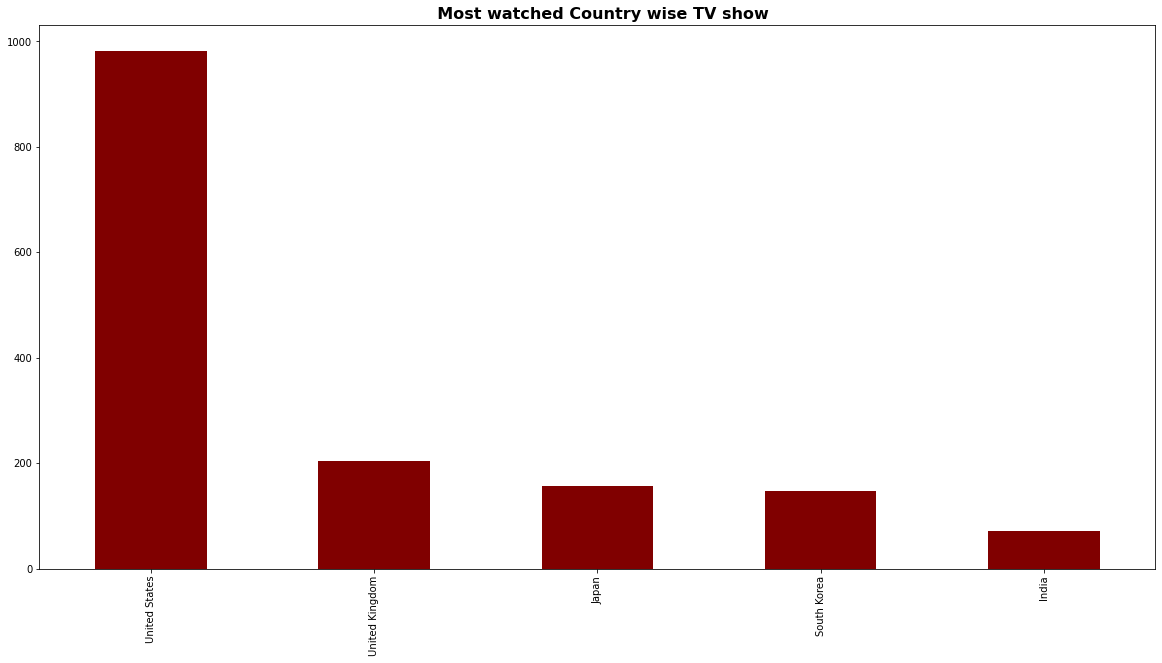

In [ ]:
top5_countries = data_df[data_df['type']=='TV Show']['country'].value_counts()[:5]
colors = 'maroon' 
top5_countries.plot(kind='bar',color=colors,figsize=(20,10))
plt.title('Most watched Country wise TV show',size='16',fontweight="bold")

##### 1. Why did you pick the specific chart?

a

##### 2. What is/are the insight(s) found from the chart?

a

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

a

#### Chart - 3. Title

#### Chart - 4 **Rating**

In [ ]:
data_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-MA ', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [ ]:
# Changing the values in the rating column
rating_names = {'TV-MA':'Adults','R':'Adults','PG-13':'Teens','TV-14':'Young Adults',
              'TV-PG':'Older Kids','NR':'Adults','TV-G':'Kids','TV-Y':'Kids',
              'TV-MA ':'Adults','TV-Y7':'Older Kids','PG':'Older Kids','G':'Kids',
              'NC-17':'Adults','TV-Y7-FV':'Older Kids','UR':'Adults'}

data_df['rating'].replace(rating_names, inplace = True)
data_df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [ ]:
data_df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

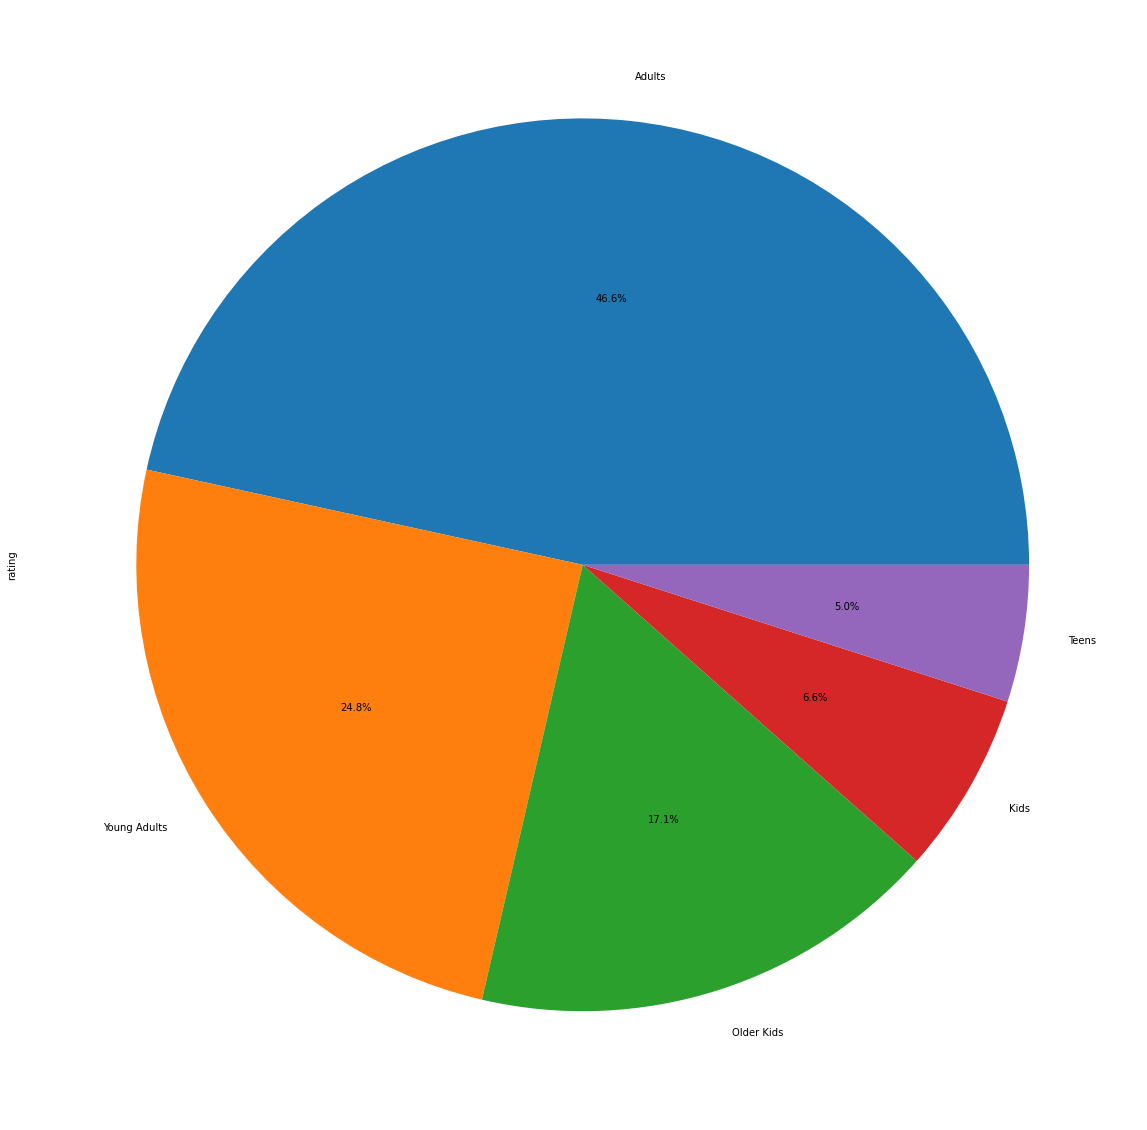

In [ ]:
data_df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35)) #distribution according to the rating
plt.show()

In [ ]:
data_df['rating'].value_counts()

Adults          3627
Young Adults    1931
Older Kids      1330
Kids             513
Teens            386
Name: rating, dtype: int64

Text(0, 0.5, 'percentage')

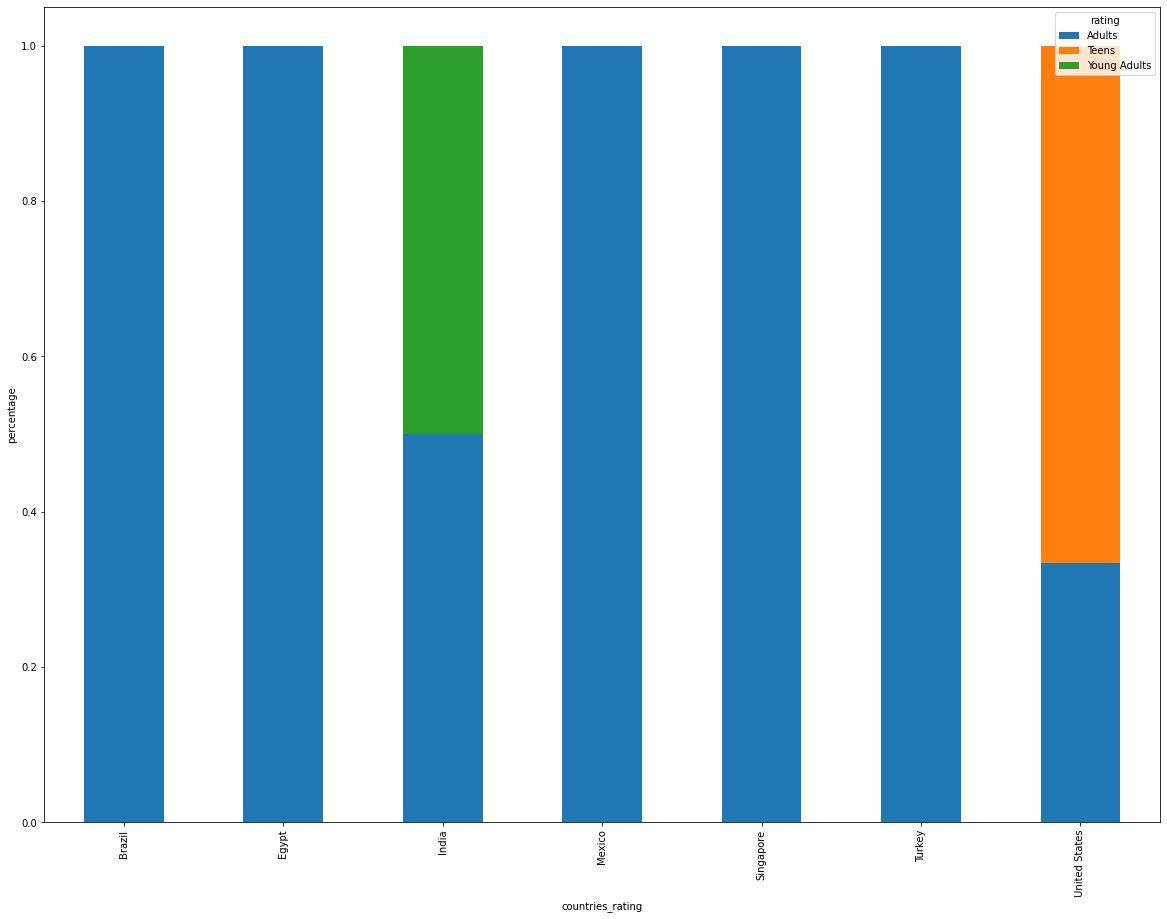

In [ ]:
countries_rating = pd.crosstab(data_df['country'][:10],data_df['rating'])
countries_rating.div(countries_rating.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(20,15))
plt.xlabel('countries_rating')
plt.ylabel('percentage')

<AxesSubplot:>

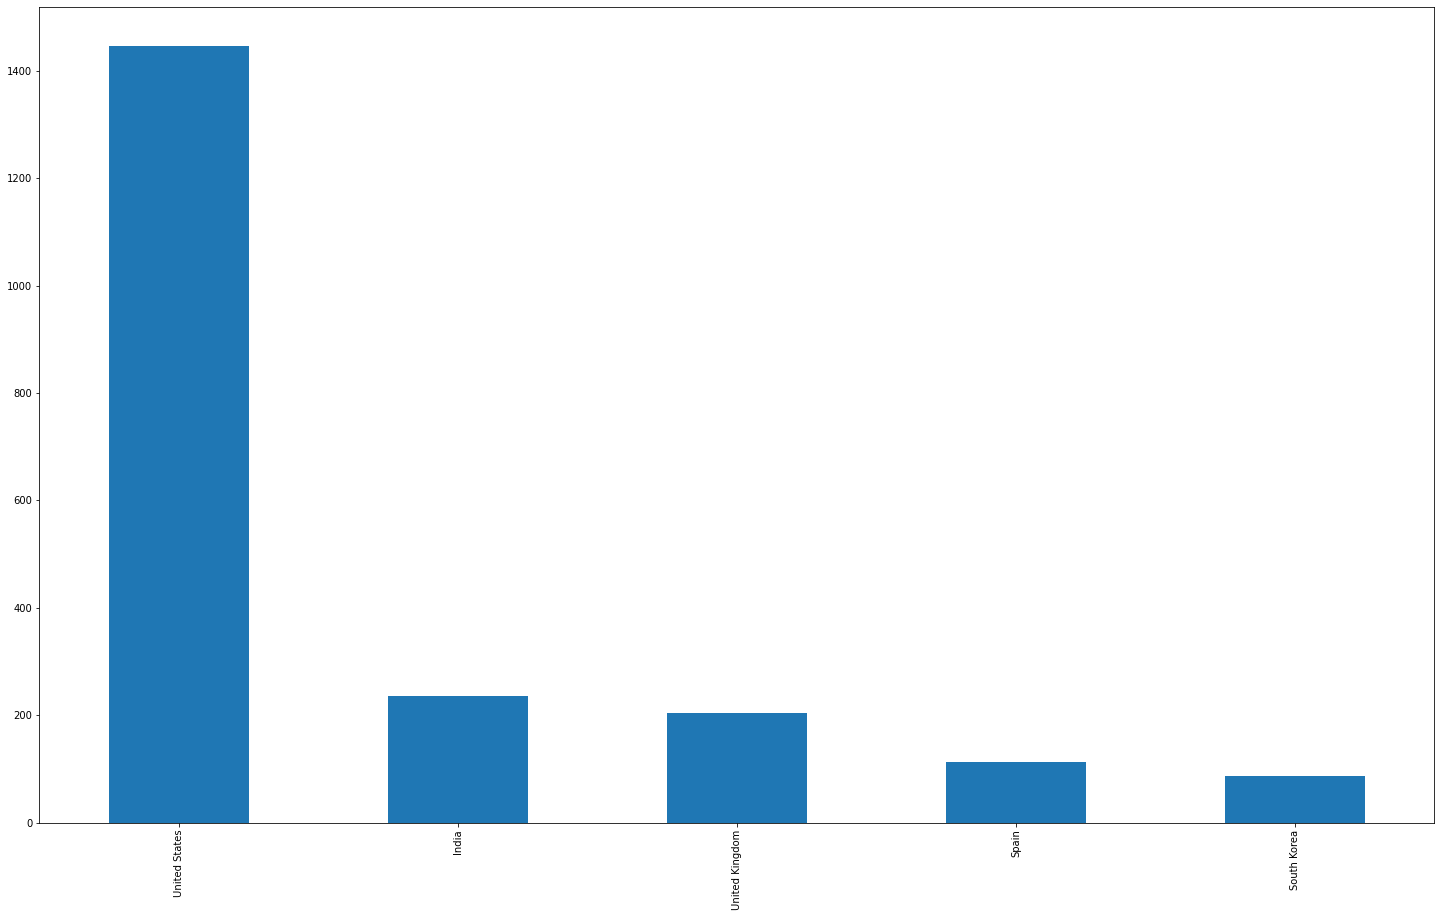

In [ ]:
indpie = data_df[data_df['rating']=='Adults']['country'].value_counts()[:5]
colors = 'maroon'
indpie.plot(kind='bar',figsize=(25,15))

<AxesSubplot:>

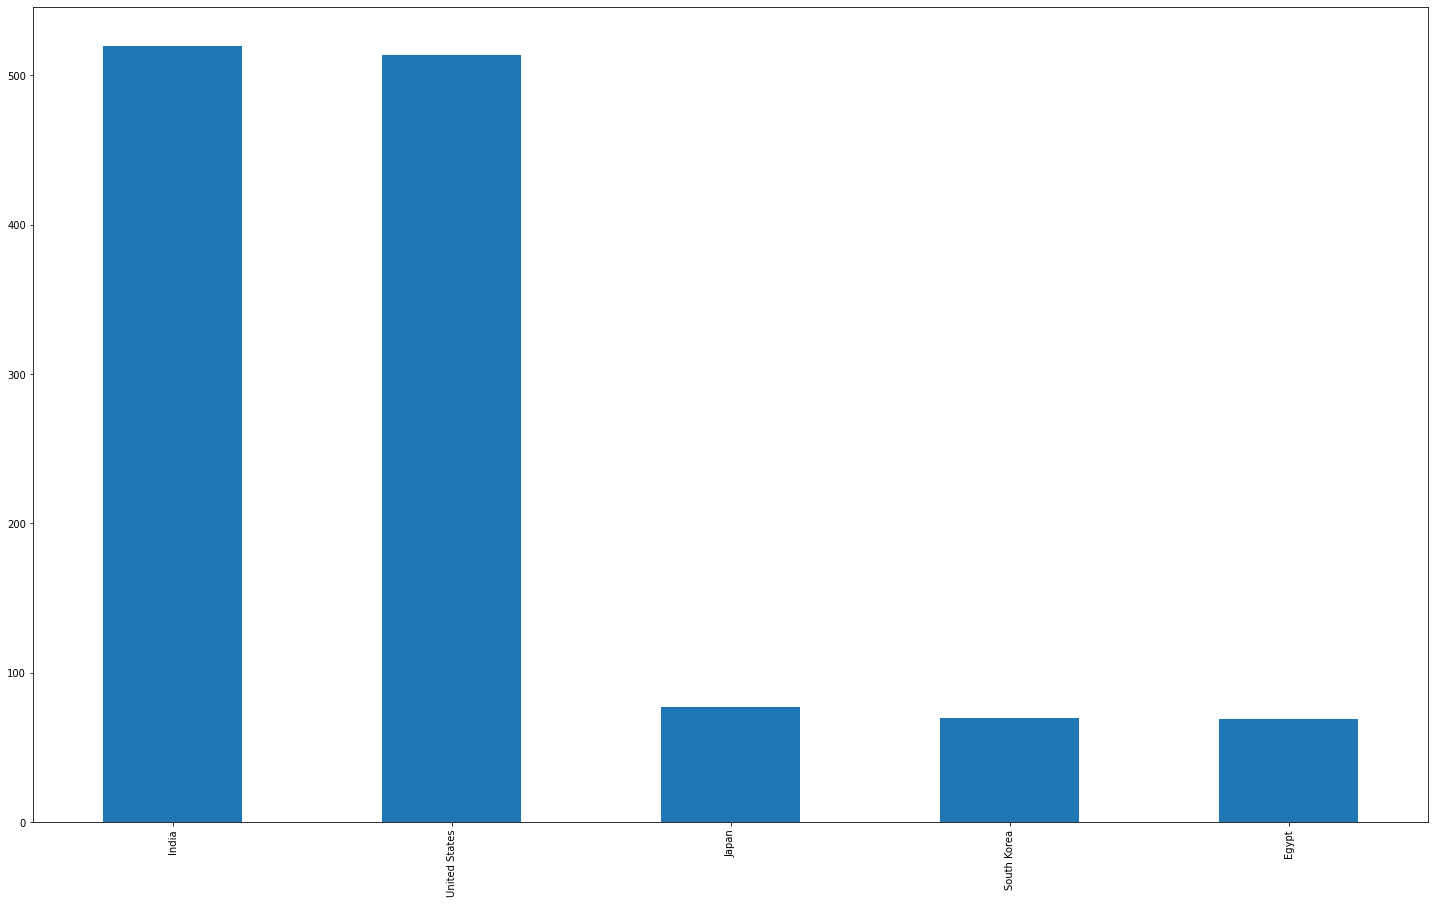

In [ ]:
indpie = data_df[data_df['rating']=='Young Adults']['country'].value_counts()[:5]
colors = 'maroon'
indpie.plot(kind='bar',figsize=(25,15))

#### Chart - 4 **release year**

In [ ]:
# Production Growth based on type of the content & release_year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1925'),
  Text(1, 0, '1942'),
  Text(2, 0, '1943'),
  Text(3, 0, '1944'),
  Text(4, 0, '1945'),
  Text(5, 0, '1946'),
  Text(6, 0, '1947'),
  Text(7, 0, '1954'),
  Text(8, 0, '1955'),
  Text(9, 0, '1956'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1962'),
  Text(14, 0, '1963'),
  Text(15, 0, '1964'),
  Text(16, 0, '1965'),
  Text(17, 0, '1966'),
  Text(18, 0, '1967'),
  Text(19, 0, '1968'),
  Text(20, 0, '1969'),
  Text(21, 0, '1970'),
  Text(22, 0, '1971'),
  Text(23, 0, '1972'),
  Text(24, 0, '1973'),
  Text(25, 0, '1974'),
  Text(26, 0, '1975'),
  Text(27, 0, '1976'),
  Text(28, 0, '1977'),
  Text(29

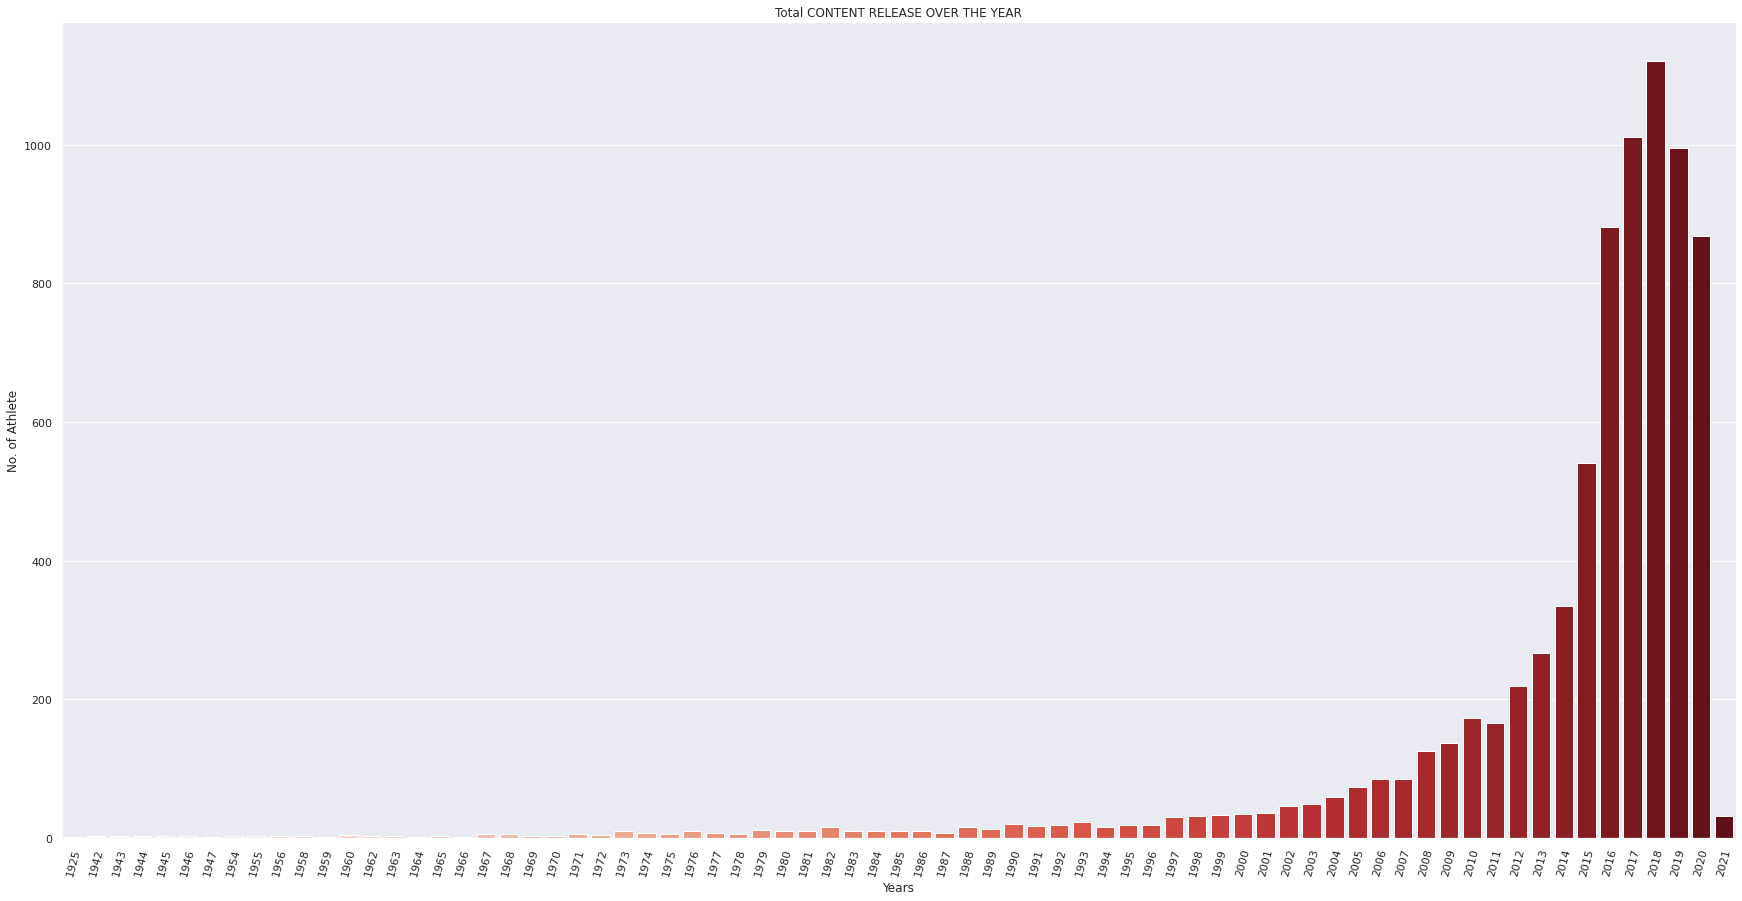

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(data_df['release_year'],palette="Reds")
plt.title('TOTAL CONTENT RELEASE OVER THE YEAR')
plt.xlabel('Years')
plt.ylabel('No. of Athlete')
plt.xticks(rotation=75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]), <a list of 73 Text major ticklabel objects>)

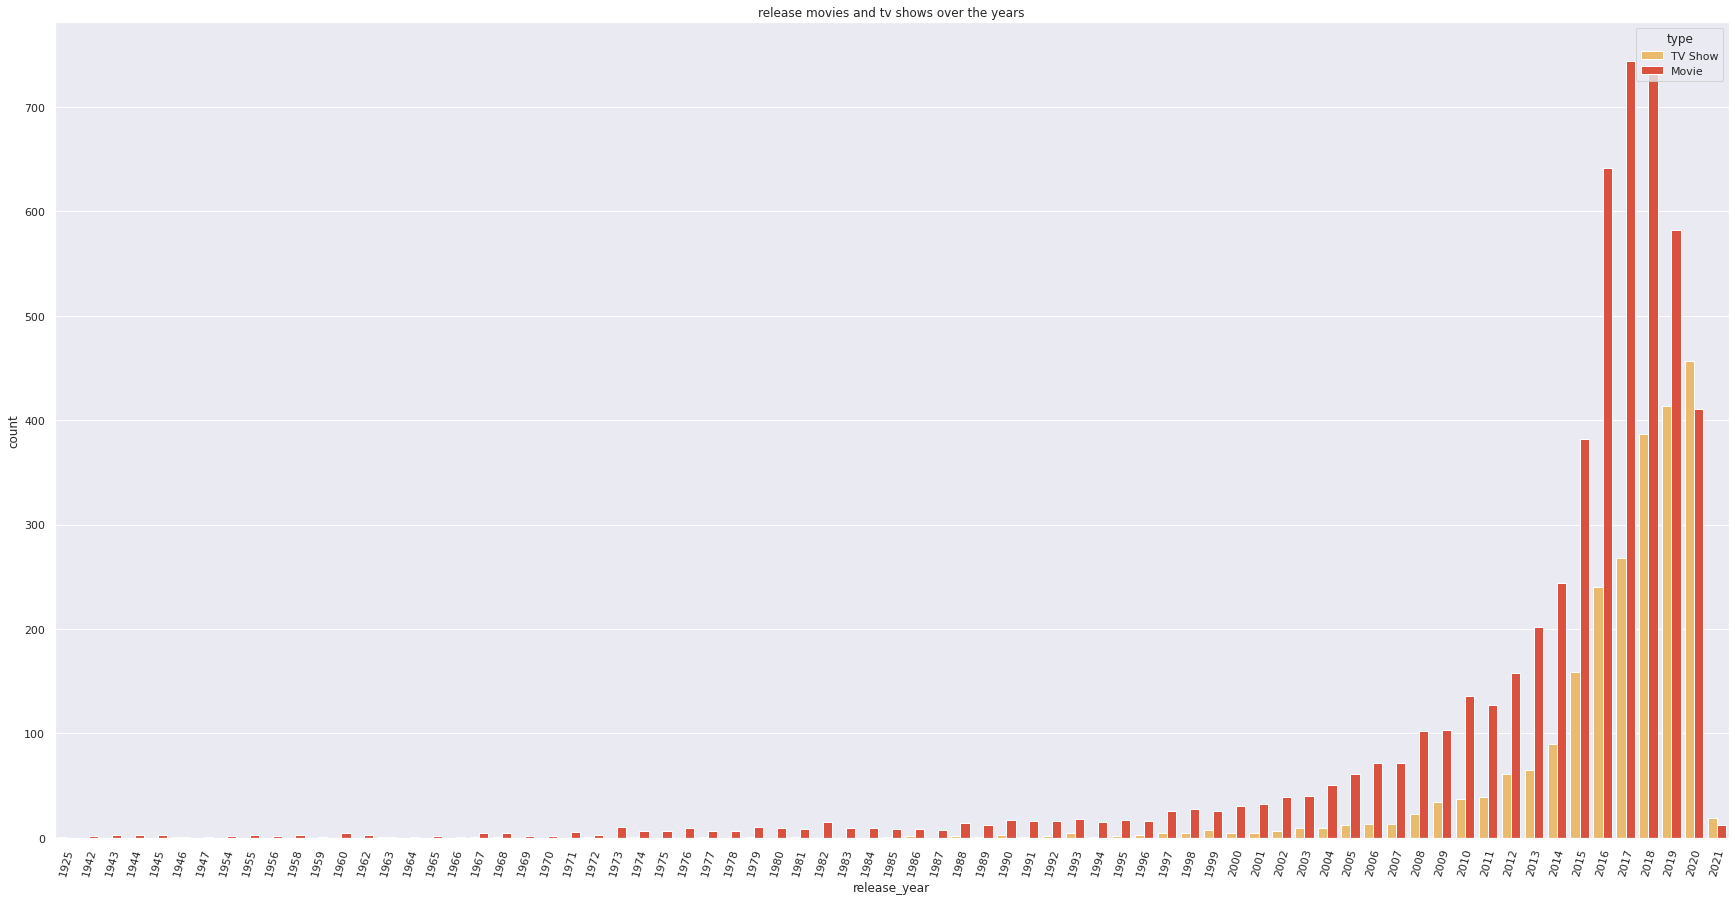

In [ ]:
sns.countplot(x='release_year',hue='type',data=data_df,palette="YlOrRd")
sns.set(rc={'figure.figsize':(30,15)})
plt.title("release movies and tv shows over the years")
plt.xticks(rotation=75)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5. Duration

In [ ]:
# Chart - 4 visualization code

In [ ]:
movies_df = data_df[data_df['type'] == 'Movie']
tvshows_df = data_df[data_df['type'] == 'TV Show']

In [ ]:
movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01 00:00:00,2019,Adults,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,Older Kids,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,2005,Adults,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02 00:00:00,2015,Young Adults,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,no director,Nasty C,United States,2020-09-25 00:00:00,2019,Adults,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [ ]:
movies_df['duration']=movies_df['duration'].str.replace(' min','')# replacing min to empty space
movies_df['duration']=movies_df['duration'].astype(str).astype(int) #changing dtype to int
movies_df['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

In [ ]:
movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,Adults,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,Adults,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,Teens,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,Teens,123,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01 00:00:00,2019,Adults,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,Older Kids,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,2005,Adults,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02 00:00:00,2015,Young Adults,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,no director,Nasty C,United States,2020-09-25 00:00:00,2019,Adults,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [ ]:
movies_df.duration.value_counts()

90     136
93     131
91     125
94     125
95     119
      ... 
214      1
182      1
224      1
233      1
191      1
Name: duration, Length: 201, dtype: int64

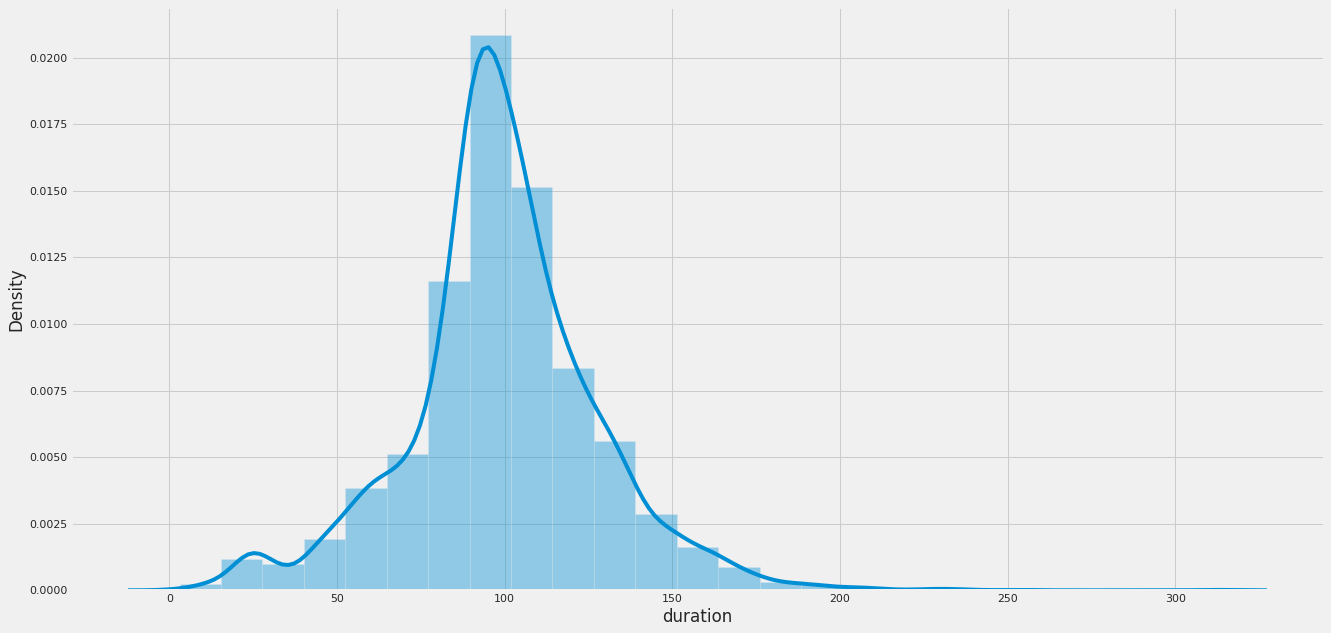

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
sns.distplot(movies_df['duration'], bins=25)

In [ ]:
tvshows_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Turkey,2017-07-01 00:00:00,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,"Poland, United States",2018-11-30 00:00:00,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Mexico,2019-05-17 00:00:00,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,United States,2019-03-20 00:00:00,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Pakistan,2016-12-15 00:00:00,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,Japan,2020-08-14 00:00:00,2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,United States,2019-07-01 00:00:00,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,Mexico,2019-11-26 00:00:00,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [ ]:
tvshows_df.duration.value_counts()

1 Season      1608
2 Seasons      382
3 Seasons      184
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       6
11 Seasons       3
13 Seasons       2
12 Seasons       2
15 Seasons       2
16 Seasons       1
Name: duration, dtype: int64

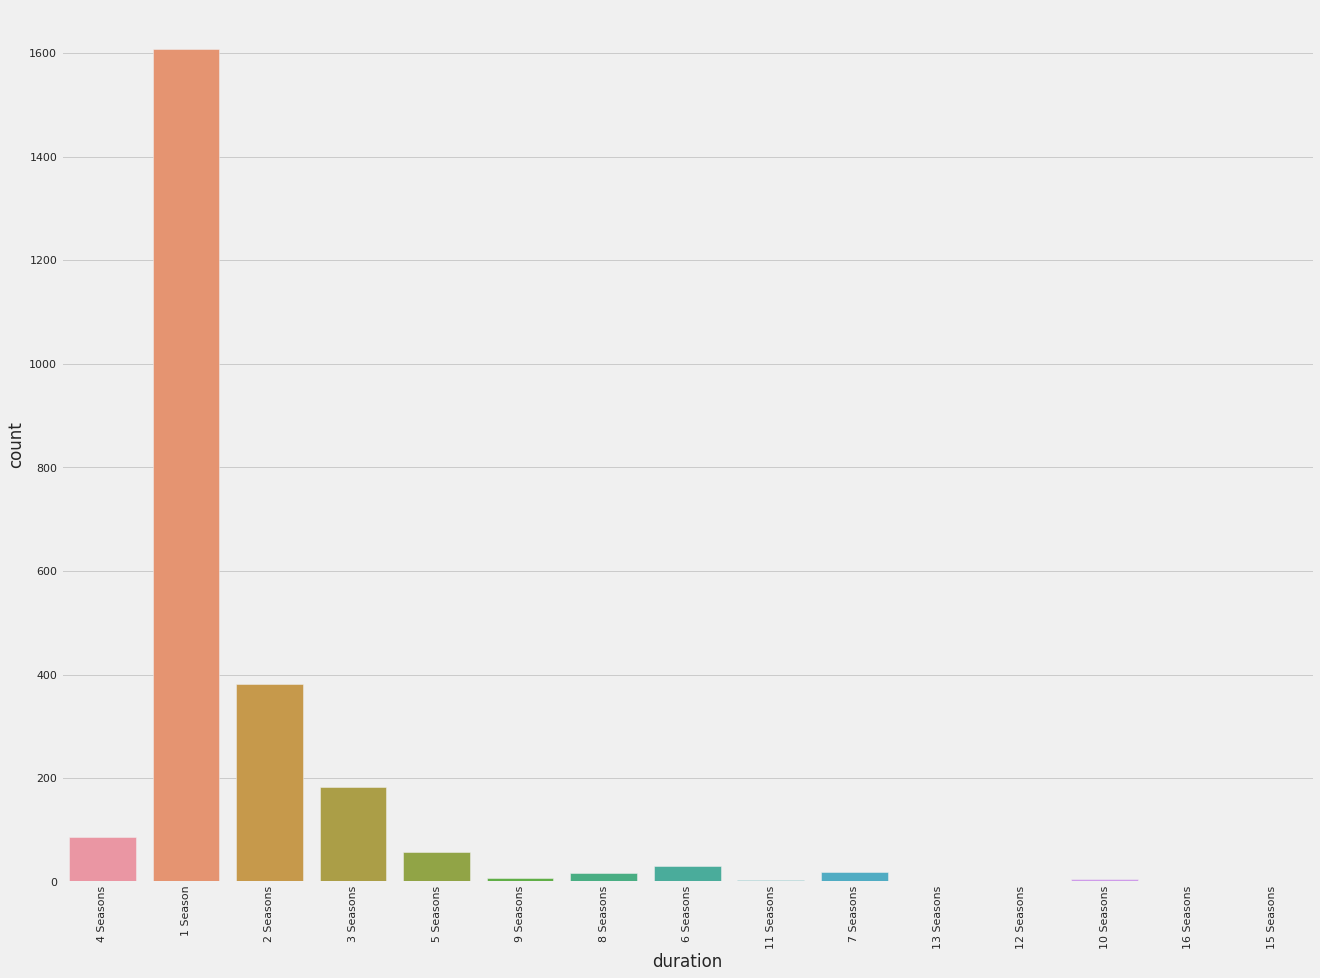

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.countplot(x='duration',data = tvshows_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

Text(0.5, 1.0, 'Top 10 genres')

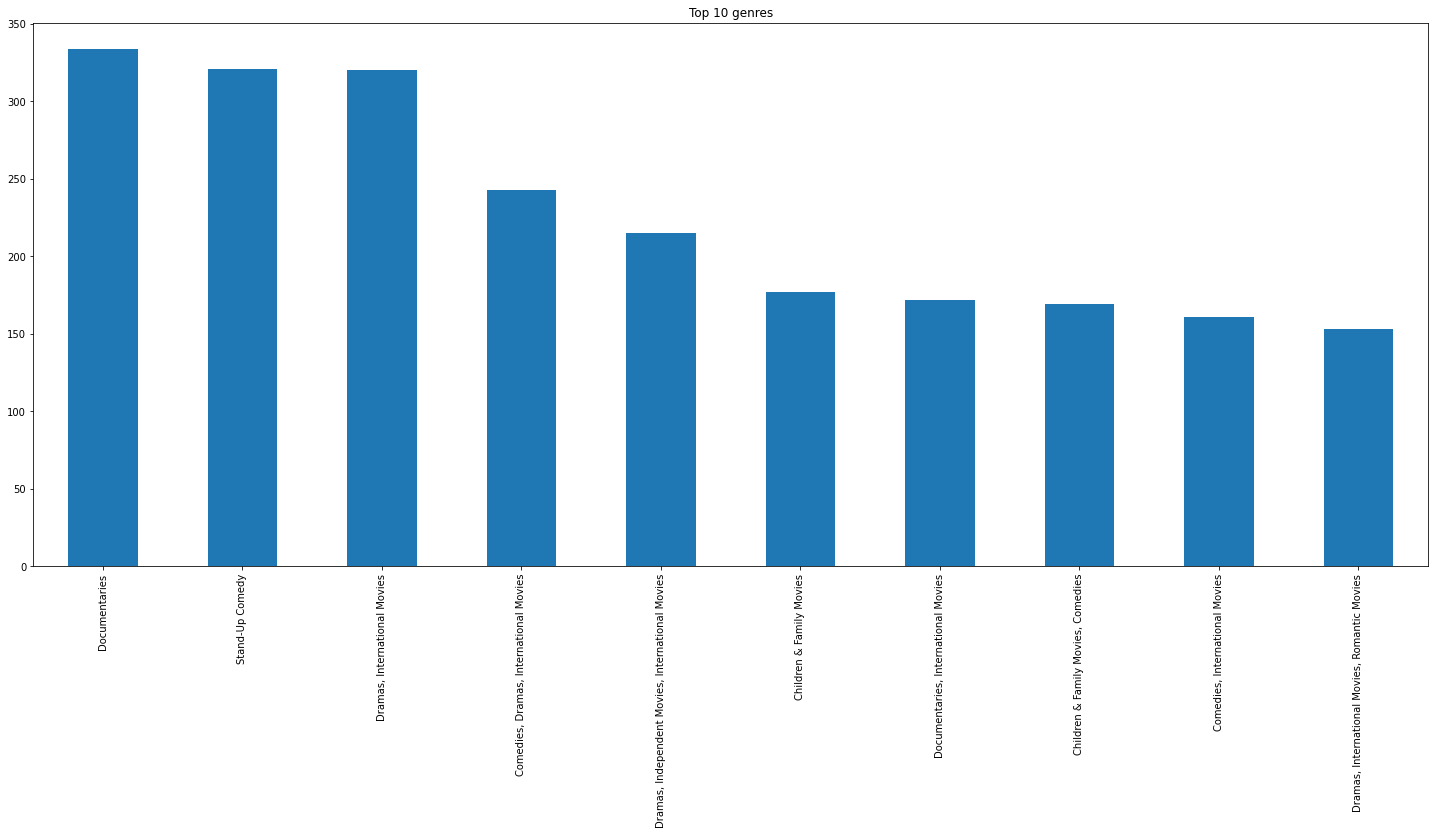

In [ ]:
# Top 10 genres for movies
plt.figure(figsize=(25,10))
movies_df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres')

Text(0.5, 1.0, 'Top 10 genres')

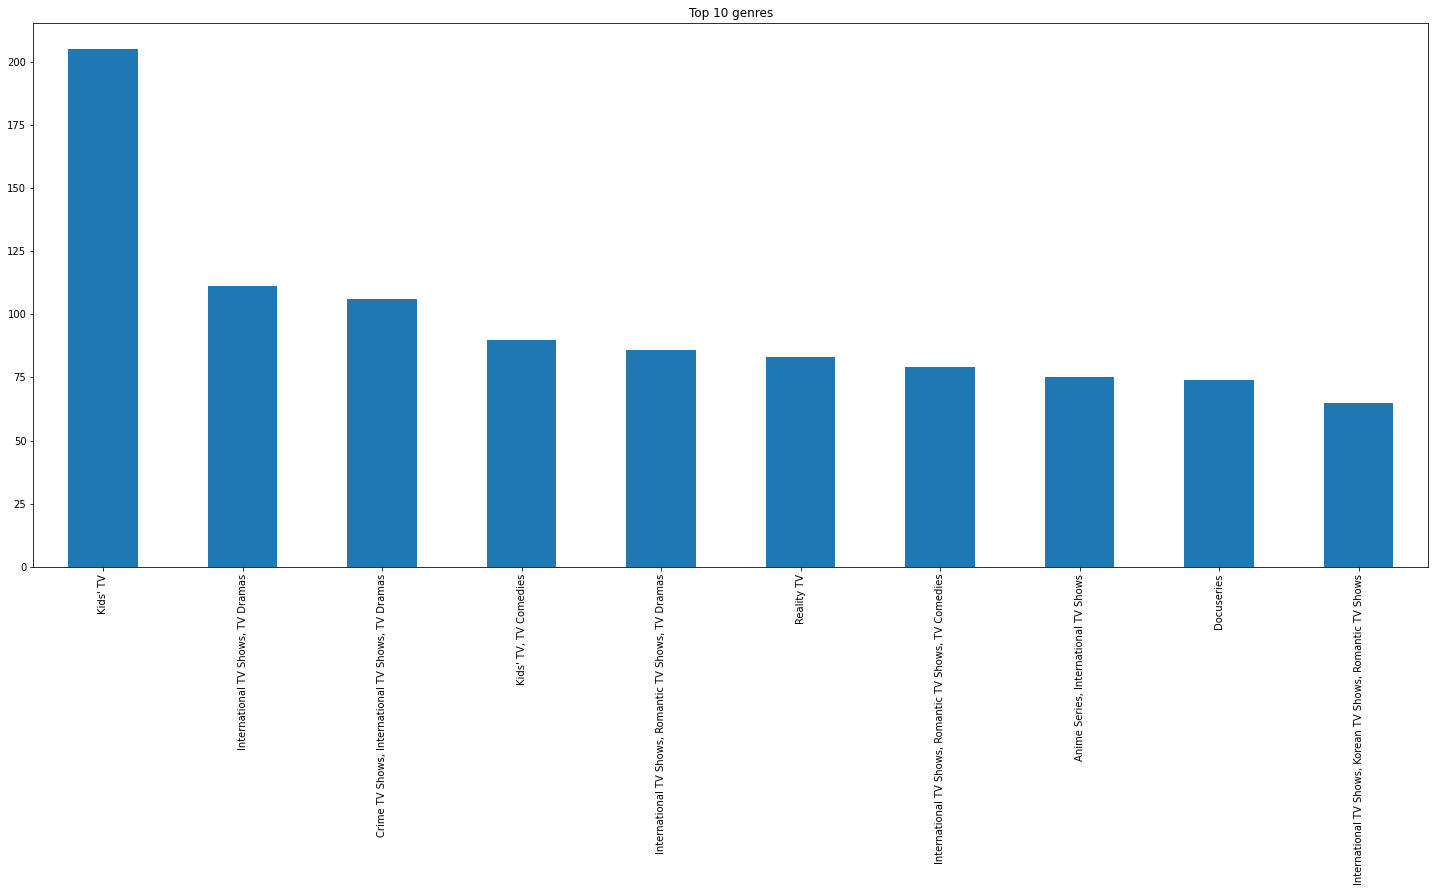

In [ ]:
# Top 10 genres tvshows
plt.figure(figsize=(25,10))
tvshows_df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres')

kids tv is the top most TV show genre in netflix.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

### **Data preprocessing**

In [ ]:
data_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,India,2019-03-02 00:00:00,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,United States,2020-09-25 00:00:00,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,2020-10-31 00:00:00,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
# Combining all the clustering attributes into a single column

data_df['clustering_attributes'] = (data_df['listed_in'] +' ' + data_df['description'])

In [ ]:
data_df['clustering_attributes'].head(10)

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1    Dramas, International Movies After a devastati...
2    Horror Movies, International Movies When an ar...
3    Action & Adventure, Independent Movies, Sci-Fi...
4    Dramas A brilliant group of students become ca...
5    International TV Shows, TV Dramas, TV Mysterie...
6    Horror Movies, International Movies After an a...
7    Dramas After one of his high school students a...
8    Horror Movies, International Movies When a doc...
9    Horror Movies, International Movies, Thrillers...
Name: clustering_attributes, dtype: object

*punctuation*

In [ ]:
def remove_punct(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
#applying above created function on the description data to remove punctuations
data_df['description'] = data_df['description'].apply(remove_punct)
data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clustering_attributes
0,s1,TV Show,3%,no director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Dramas, International Movies After a devastati..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,"Horror Movies, International Movies When an ar..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,Dramas A brilliant group of students become ca...


In [ ]:
#applying above created function on the description data to remove punctuations
data_df['listed_in'] = data_df['listed_in'].apply(remove_punct)
data_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,International TV Shows TV Dramas TV SciFi Fan...,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,Dramas International Movies,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2018-12-20 00:00:00,2011,R,78 min,Horror Movies International Movies,When an army recruit is found dead his fellow ...
3,s4,Movie,9,United States,2017-11-16 00:00:00,2009,PG-13,80 min,Action Adventure Independent Movies SciFi Fa...,In a postapocalyptic world ragdoll robots hide...
4,s5,Movie,21,United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...


In [ ]:
#applying above created function on the description data to remove punctuations
data_df['clustering_attributes'] = data_df['clustering_attributes'].apply(remove_punct)
data_df.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clustering_attributes
0,s1,TV Show,3%,no director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,International TV Shows TV Dramas TV SciFi Fan...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Dramas International Movies After a devastatin...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,Horror Movies International Movies When an arm...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,Action Adventure Independent Movies SciFi Fa...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,Dramas A brilliant group of students become ca...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01 00:00:00,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,International TV Shows TV Dramas TV Mysteries ...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01 00:00:00,2019,TV-MA,95 min,"Horror Movies, International Movies",After an awful accident a couple admitted to a...,Horror Movies International Movies After an aw...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01 00:00:00,1997,R,119 min,Dramas,After one of his high school students attacks ...,Dramas After one of his high school students a...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01 00:00:00,2019,TV-14,118 min,"Horror Movies, International Movies",When a doctor goes missing his psychiatrist wi...,Horror Movies International Movies When a doct...
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15 00:00:00,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,Horror Movies International Movies Thrillers A...


In [ ]:
# Seeing the stop words 
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array({'out', 'i', 'he', 'the', 'being', "wasn't", 'a', 'as', 'his', 'not', 'has', 'over', 'didn', "mustn't", 'more', 'now', 'itself', 'weren', 'isn', "it's", 'off', 'shouldn', "you'll", 'own', 'wouldn', 'by', 're', 'because', 'above', 'did', 'were', 'yourself', 'is', 'or', 'so', 'mustn', 'too', 'are', 'had', 'further', 'its', 'd', 'while', 'it', 'no', 'll', 'aren', 'mightn', 'that', 'yours', 'o', 'can', "isn't", 'against', 'up', 'does', 'whom', 'below', 'himself', 'then', 'shan', 'having', 'but', 'where', "doesn't", 'on', 'hadn', 'doing', 'few', "should've", 'and', 'y', 'don', 'from', 'before', 'm', 'him', "shan't", 'been', 'what', "hasn't", "haven't", 'which', 'her', 'other', 'couldn', "you've", 'who', 'be', 'will', 'you', 'down', 'there', 'needn', "weren't", "couldn't", 'only', 'do', 'both', 's', 'your', 'nor', "shouldn't", 'of', 'each', 'theirs', 'during', 'them', 'we', "you'd", 'once', 'how', 'very', 'their', 'hers', "mightn't", 'just', 'ain', 'me', 'under', 'ma', 'should', 'ourse

In [ ]:
# creatinf a function for removing the stop words in DESCRIPTION attribute
def stopwords(text):
    '''a function for removing the stopword'''
    text = [w.lower() for w in text.split() if w.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)


In [ ]:
data_df['clustering_attributes']=data_df['clustering_attributes'].apply(stopwords)

In [ ]:
data_df['description']=data_df['description'].apply(stopwords)


In [ ]:
data_df['listed_in']=data_df['listed_in'].apply(stopwords)


In [ ]:
data_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,dramas international movies,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Singapore,2018-12-20 00:00:00,2011,R,78 min,horror movies international movies,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,United States,2017-11-16 00:00:00,2009,PG-13,80 min,action adventure independent movies scifi fantasy,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,United States,2020-01-01 00:00:00,2008,PG-13,123 min,dramas,brilliant group students become cardcounting e...
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,2005,TV-MA,99 min,dramas international movies,lebanons civil war deprives zozo family hes le...
7783,s7784,Movie,Zubaan,India,2019-03-02 00:00:00,2015,TV-14,111 min,dramas international movies music musicals,scrappy poor boy worms way tycoons dysfunction...
7784,s7785,Movie,Zulu Man in Japan,United States,2020-09-25 00:00:00,2019,TV-MA,44 min,documentaries international movies music musicals,documentary south african rapper nasty c hits ...
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,2020-10-31 00:00:00,2019,TV-PG,1 Season,international tv shows reality tv,dessert wizard adriano zumbo looks next “willy...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
#Tokenization
import string
def tokenizer(text):  
  tokens = word_tokenize(text) 
  
  return tokens


In [ ]:
data_df['clustering_attributes'] = data_df['clustering_attributes'].apply(tokenizer)

In [ ]:
data_df['description'] = data_df['description'].apply(tokenizer)

In [ ]:
data_df['listed_in'] = data_df['listed_in'].apply(tokenizer)

In [ ]:
data_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,clustering_attributes
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[international, tv, shows, tv, dramas, tv, sci..."
1,s2,Movie,7:19,Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[dramas, international, movies, devastating, e..."
2,s3,Movie,23:59,Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[horror, movies, international, movies, army, ..."
3,s4,Movie,9,United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[action, adventure, independent, movies, scifi..."
4,s5,Movie,21,United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[dramas, brilliant, group, students, become, c..."
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"[dramas, international, movies, lebanons, civi..."
7783,s7784,Movie,Zubaan,India,2019-03-02 00:00:00,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[dramas, international, movies, music, musical..."
7784,s7785,Movie,Zulu Man in Japan,United States,2020-09-25 00:00:00,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...","[documentaries, international, movies, music, ..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,2020-10-31 00:00:00,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,"[international, tv, shows, reality, tv, desser..."


In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
#Extracting rootwords
ps = PorterStemmer()

def stem_text(text):  
  stemmed = []
  for word in text:
    stemmed.append(ps.stem(word))
  return stemmed


In [ ]:
data_df['clustering_attributes'] = data_df['clustering_attributes'] .apply(lambda x : stem_text(x)) 

In [ ]:
data_df['description'] = data_df['description'] .apply(lambda x : stem_text(x)) 

In [ ]:
data_df['listed_in'] = data_df['listed_in'] .apply(lambda x : stem_text(x)) 

In [ ]:
data_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,clustering_attributes
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[intern, tv, show, tv, drama, tv, scifi, fanta..."
1,s2,Movie,7:19,Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[drama, intern, movi, devast, earthquak, hit, ..."
2,s3,Movie,23:59,Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[horror, movi, intern, movi, armi, recruit, fo..."
3,s4,Movie,9,United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[action, adventur, independ, movi, scifi, fant..."
4,s5,Movie,21,United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[drama, brilliant, group, student, becom, card..."
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"[drama, intern, movi, lebanon, civil, war, dep..."
7783,s7784,Movie,Zubaan,India,2019-03-02 00:00:00,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[drama, intern, movi, music, music, scrappi, p..."
7784,s7785,Movie,Zulu Man in Japan,United States,2020-09-25 00:00:00,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...","[documentari, intern, movi, music, music, docu..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,2020-10-31 00:00:00,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,"[intern, tv, show, realiti, tv, dessert, wizar..."


In [ ]:
def joiner(text_list):
  new = []
  for text in text_list:
    if text == ' ' or text == '' :
      pass
    else:
      new.append(text)
      
  return ' '.join(new)

In [ ]:
data_df['clustering_attributes'] = data_df['clustering_attributes'] .apply(lambda x : joiner(x))


In [ ]:
data_df['description'] = data_df['description'] .apply(lambda x : joiner(x))


In [ ]:
data_df['listed_in'] = data_df['listed_in'] .apply(lambda x : joiner(x))


In [ ]:
data_df.head(15)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,clustering_attributes
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,intern tv show tv drama tv scifi fantasi futur...
1,s2,Movie,7:19,Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit mexico ...
2,s3,Movie,23:59,Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...
3,s4,Movie,9,United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",action adventur independ movi scifi fantasi po...
4,s5,Movie,21,United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,drama brilliant group student becom cardcount ...
5,s6,TV Show,46,Turkey,2017-07-01 00:00:00,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,intern tv show tv drama tv mysteri genet profe...
6,s7,Movie,122,Egypt,2020-06-01 00:00:00,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",horror movi intern movi aw accid coupl admit g...
7,s8,Movie,187,United States,2019-11-01 00:00:00,1997,R,119 min,Dramas,After one of his high school students attacks ...,drama one high school student attack dedic tea...
8,s9,Movie,706,India,2019-04-01 00:00:00,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",horror movi intern movi doctor goe miss psychi...
9,s10,Movie,1920,India,2017-12-15 00:00:00,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,horror movi intern movi thriller architect wif...


In [ ]:
data_df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Converting word to vector
count_vectorizer = CountVectorizer(min_df = 10,max_df=0.5)
count_clustering_attributes_vector = count_vectorizer.fit_transform(data_df['clustering_attributes'])

In [ ]:
data_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,clustering_attributes
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,intern tv show tv drama tv scifi fantasi futur...
1,s2,Movie,7:19,Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit mexico ...
2,s3,Movie,23:59,Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...
3,s4,Movie,9,United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",action adventur independ movi scifi fantasi po...
4,s5,Movie,21,United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,drama brilliant group student becom cardcount ...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,drama intern movi lebanon civil war depriv zoz...
7783,s7784,Movie,Zubaan,India,2019-03-02 00:00:00,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,drama intern movi music music scrappi poor boy...
7784,s7785,Movie,Zulu Man in Japan,United States,2020-09-25 00:00:00,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",documentari intern movi music music documentar...
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,2020-10-31 00:00:00,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,intern tv show realiti tv dessert wizard adria...


In [ ]:
#Converting word to vector
count_vectorizer = CountVectorizer(min_df = 10,max_df=0.5)
count_description_vector = count_vectorizer.fit_transform(data_df['description'])
count_listed_in_vector  = count_vectorizer.fit_transform(data_df['listed_in'])


In [ ]:
# clustering tokens saved in a variable
data_df['clustering_vectorization'] = (data_df['description'] +' '+ data_df['listed_in'])

In [ ]:
data_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,clustering_vectorization
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,futur elit inhabit island paradis far crowd sl...
1,s2,Movie,7:19,Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,devast earthquak hit mexico citi trap survivor...
2,s3,Movie,23:59,Singapore,2018-12-20 00:00:00,2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,armi recruit found dead fellow soldier forc co...
3,s4,Movie,9,United States,2017-11-16 00:00:00,2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,postapocalypt world ragdol robot hide fear dan...
4,s5,Movie,21,United States,2020-01-01 00:00:00,2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,brilliant group student becom cardcount expert...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,2005,TV-MA,99 min,drama intern movi,lebanon civil war depriv zozo famili he left g...,lebanon civil war depriv zozo famili he left g...
7783,s7784,Movie,Zubaan,India,2019-03-02 00:00:00,2015,TV-14,111 min,drama intern movi music music,scrappi poor boy worm way tycoon dysfunct fami...,scrappi poor boy worm way tycoon dysfunct fami...
7784,s7785,Movie,Zulu Man in Japan,United States,2020-09-25 00:00:00,2019,TV-MA,44 min,documentari intern movi music music,documentari south african rapper nasti c hit s...,documentari south african rapper nasti c hit s...
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,2020-10-31 00:00:00,2019,TV-PG,1 Season,intern tv show realiti tv,dessert wizard adriano zumbo look next “ willi...,dessert wizard adriano zumbo look next “ willi...


In [ ]:
count_clustering_attributes_vector

<7787x2081 sparse matrix of type '<class 'numpy.int64'>'
	with 106826 stored elements in Compressed Sparse Row format>

In [ ]:
data_df['count_clustering_attributes_vector'].head()

In [ ]:
count_clustering_attributes_vector.shape

(7787, 2081)

In [ ]:
print(count_clustering_attributes_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X = count_clustering_attributes_vector

In [ ]:
# convert X into array form for clustering
X =X.toarray()
     

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

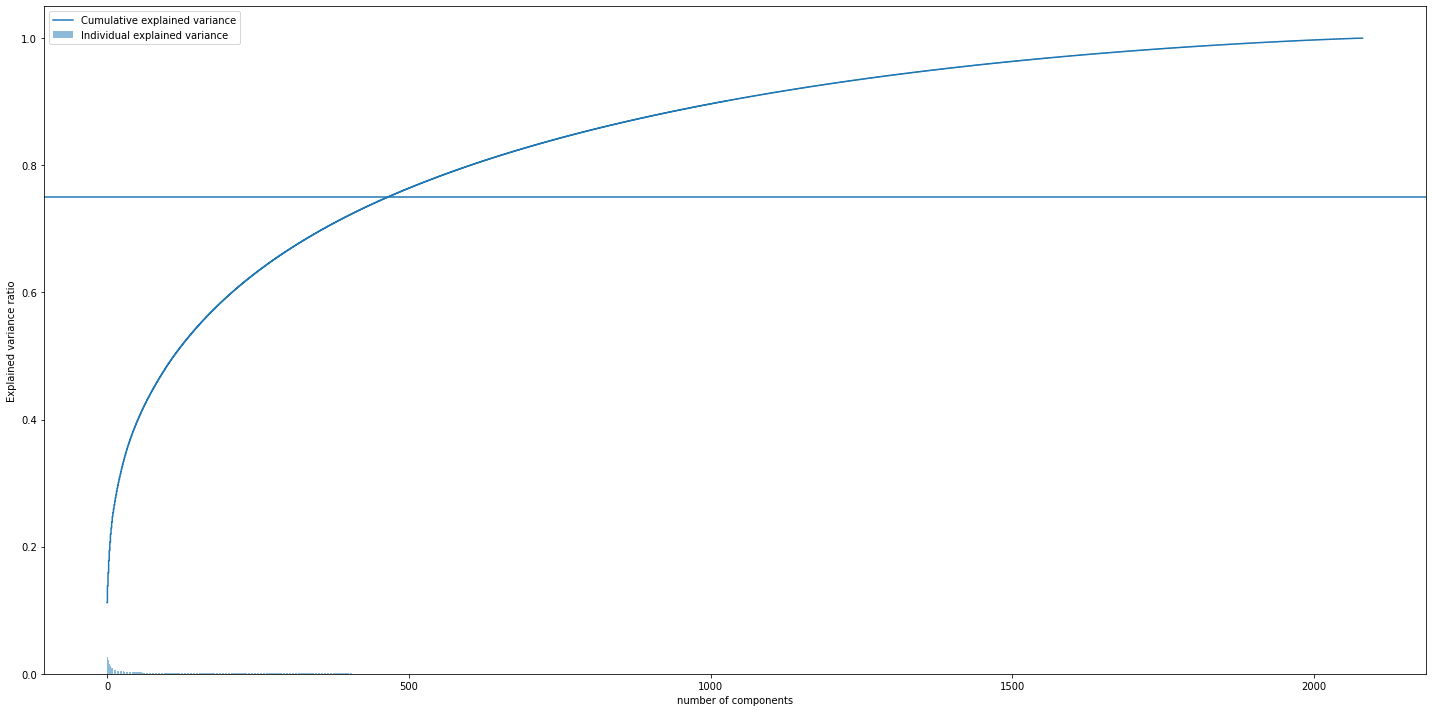

In [ ]:
# Scree Plot of PCA
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize = (20,10))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('number of components')
plt.legend(loc='best')
plt.tight_layout()
plt.axhline(y=0.75)
plt.show()

In [ ]:
X = X.toarray()
X = X.to_numpy()

In [ ]:
data_df['clustering_attributes']

0       intern tv show tv drama tv scifi fantasi futur...
1       drama intern movi devast earthquak hit mexico ...
2       horror movi intern movi armi recruit found dea...
3       action adventur independ movi scifi fantasi po...
4       drama brilliant group student becom cardcount ...
                              ...                        
7782    drama intern movi lebanon civil war depriv zoz...
7783    drama intern movi music music scrappi poor boy...
7784    documentari intern movi music music documentar...
7785    intern tv show realiti tv dessert wizard adria...
7786    documentari music music documentari delv mysti...
Name: clustering_attributes, Length: 7787, dtype: object

In [ ]:
#Normalizing the clustering data using MinMax Scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_features= X
scaler = preprocessing.StandardScaler()
X_rescale = scaler.fit_transform(X_features)

###Clusters implementation:

K-Means Clustering
Applying Elbow Method

In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

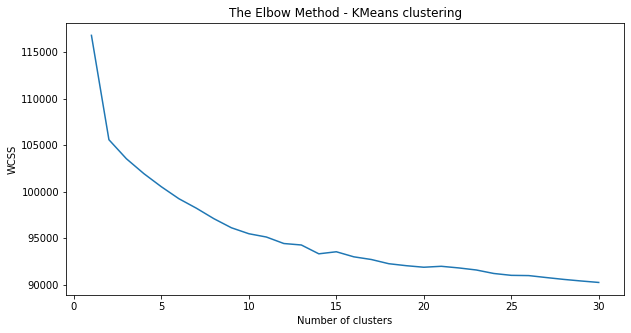

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

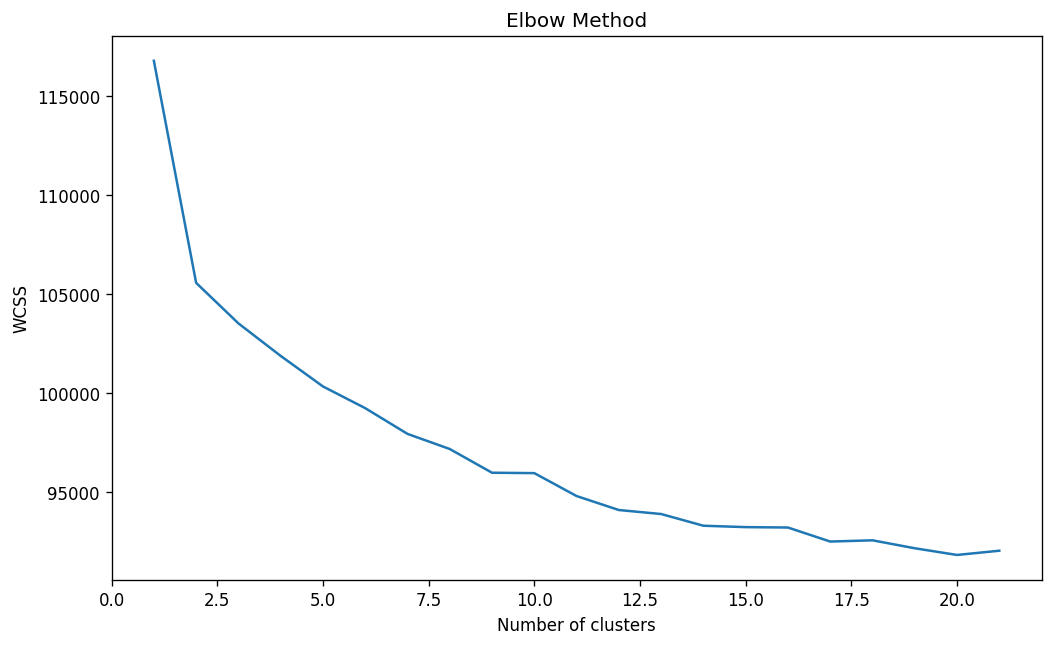

In [ ]:
# Interpretation of a line plot with an elbow shape
plt.figure(figsize=(10,6), dpi=120)
wcss = [] # within clusters sum of squares
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
mycenters = pd.DataFrame({'Clusters' : i, 'WCSS' : wcss})
mycenters

,Clusters,WCSS
0,21,125513.932708
1,21,114218.747286
2,21,111256.182562
3,21,109758.857718
4,21,108240.818780
5,21,107088.828599
6,21,105877.262876
7,21,104980.262193
8,21,103892.814513
9,21,103580.798708


###Applying Silhouette Score Method

In [ ]:
import sklearn.cluster as cluster

In [ ]:
import sklearn.metrics as metrics

In [ ]:
SK = range(2,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    score = metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.1400250762066477
Silhouette score for k(clusters) = 3 is 0.038617433479133906
Silhouette score for k(clusters) = 4 is 0.04203793591609691
Silhouette score for k(clusters) = 5 is 0.0359930003534106
Silhouette score for k(clusters) = 6 is 0.04106373439581883
Silhouette score for k(clusters) = 7 is 0.04183558950841508
Silhouette score for k(clusters) = 8 is 0.039986394522598244
Silhouette score for k(clusters) = 9 is 0.03501799889003074
Silhouette score for k(clusters) = 10 is 0.03687383027845236
Silhouette score for k(clusters) = 11 is 0.03784942230424555
Silhouette score for k(clusters) = 12 is 0.0370998662575949


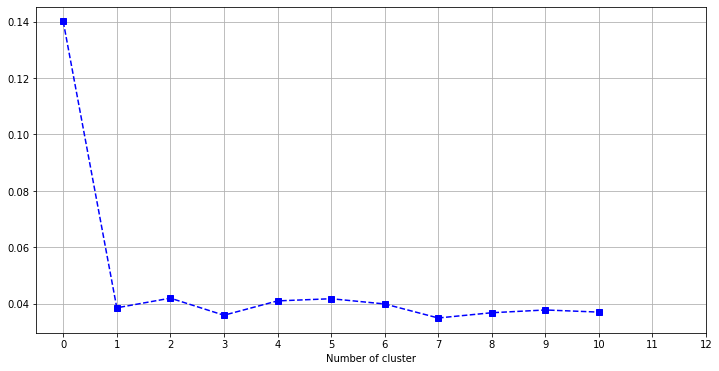

In [ ]:
#Plotting Sillhoute's score
plt.figure(figsize =(12, 6))
plt.plot(sil_score,'bs--')
plt.xticks(list(range(0,13)),list(range(0,13)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()
     

In [ ]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,3,0.044816
1,4,0.036824
2,5,0.034651
3,6,0.032649
4,7,0.032126
5,8,0.033924
6,9,0.030895
7,10,0.030769
8,11,0.032347
9,12,0.026237


<AxesSubplot:xlabel='Clusters', ylabel='Sil Score'>

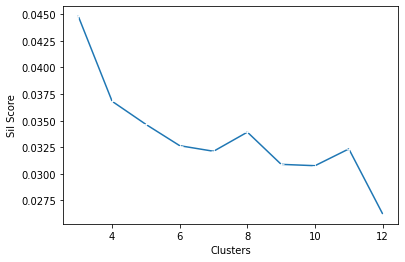

In [ ]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

In [ ]:
#training the K-means model on a dataset  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)

In [ ]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.13469730235147273


In [ ]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

2.53237707080334

###2. Dendogram

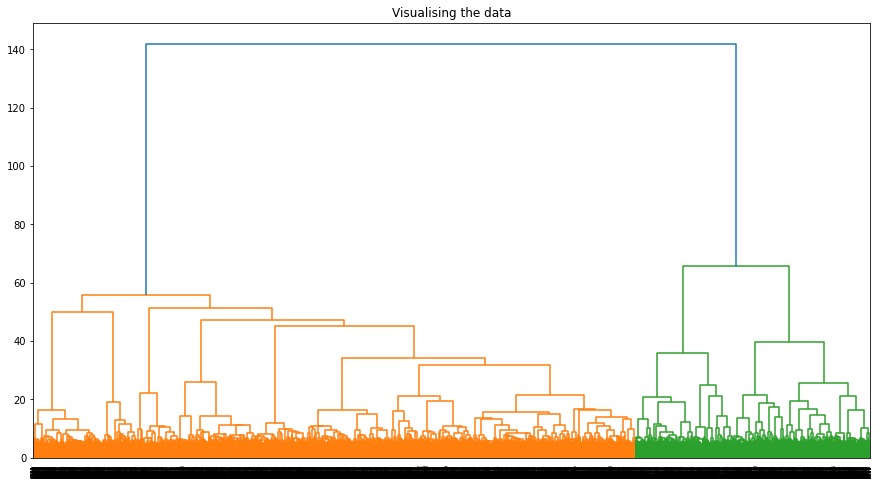

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(15, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

###3. Agglomerative Clustering

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =data_df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,clustering_attributes,cluster
0,s1,TV Show,3%,Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,intern tv show tv drama tv scifi fantasi futur...,0
1,s2,Movie,7:19,Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit mexico ...,1
2,s3,Movie,23:59,Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...,1
3,s4,Movie,9,United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",action adventur independ movi scifi fantasi po...,1
4,s5,Movie,21,United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,drama brilliant group student becom cardcount ...,1


In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: 0.105


In [ ]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

2.9412422492423254

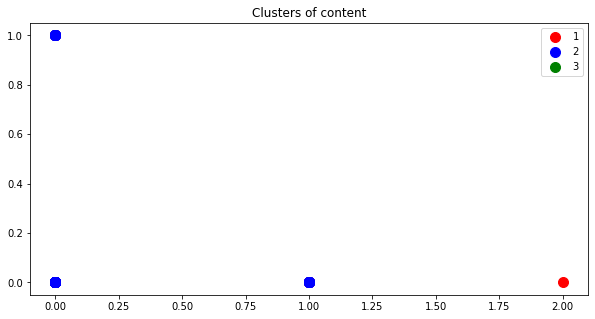

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(10,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

##Observation:


By applying different clustering algorithem to our dataset, we get the optimal number of cluster is equal to 2

###8. Content based recommender system:


To get the similarity score of the shows, we can use cosine similarity

For this recommender system the content of the movie (cast, description, director,genre etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended

I want my recommender to be based only on the title, movie director, cast, genre and description of movies, so these are the only columns I considered in the modeling

I want my recommender to be based only on the title, movie director, cast, genre and description of movies, so these are the only columns I considered in the modeling

In [ ]:
new_df = data_df[['title','director','cast','listed_in','description']]
new_df.head()

,title,director,cast,listed_in,description
0,3%,no director,"João Miguel, Bianca Comparato, Michel Gomes, R...","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Horror Movies, International Movies",When an army recruit is found dead his fellow ...
3,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...","Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...
4,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Dramas,A brilliant group of students become cardcount...


In [ ]:
!pip install rake-nltk
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
new_df.dropna(inplace=True)

blanks = []  # start with an empty list

col=['title','director','cast','listed_in','description']
for i,col in new_df.iterrows():  # iterate over the DataFrame
    if type(col)==str:            # avoid NaN values
        if col.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

new_df.drop(blanks, inplace=True)

In [ ]:
# initializing the new column
new_df['Key_words'] = ""

for index, row in new_df.iterrows():
    description = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(description)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
new_df.drop(columns = ['description'], inplace = True)

In [ ]:
# discarding the commas between the actors' full names and getting only the first three names
new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])

# putting the genres in a list of words
new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))

new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ''.join(row['director']).lower()

In [ ]:
new_df.set_index('title', inplace = True)
new_df.head()

,director,cast,listed_in,Key_words
title,,,,
3%,nodirector,"[joãomiguel, biancacomparato, michelgomes]","[international tv shows, tv dramas, tv sci-f...","[future, elite, inhabit, island, paradise, far..."
7:19,jorgemichelgrau,"[demiánbichir, héctorbonilla, oscarserrano]","[dramas, international movies]","[devastating, earthquake, hits, mexico, city, ..."
23:59,gilbertchan,"[teddchan, stellachung, henleyhii]","[horror movies, international movies]","[army, recruit, found, dead, fellow, soldiers,..."
9,shaneacker,"[elijahwood, johnc.reilly, jenniferconnelly]","[action & adventure, independent movies, sci...","[postapocalyptic, world, ragdoll, robots, hide..."
21,robertluketic,"[jimsturgess, kevinspacey, katebosworth]",[dramas],"[brilliant, group, students, become, cardcount..."


In [ ]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
new_df.drop(columns = [col for col in new_df.columns if col!= 'bag_of_words'], inplace = True)

In [ ]:
new_df.head()

,bag_of_words
title,
3%,nodirector joãomiguel biancacomparato michelgo...
7:19,jorgemichelgrau demiánbichir héctorbonilla osc...
23:59,gilbertchan teddchan stellachung henleyhii hor...
9,shaneacker elijahwood johnc.reilly jennifercon...
21,robertluketic jimsturgess kevinspacey katebosw...


###7.2 Feature Extraction and Modeling

In [ ]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['bag_of_words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(new_df.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [ ]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.07422696, 0.06827887, ..., 0.07597372, 0.30725493,
        0.        ],
       [0.07422696, 1.        , 0.1254363 , ..., 0.13957263, 0.0418121 ,
        0.        ],
       [0.06827887, 0.1254363 , 1.        , ..., 0.12838815, 0.03846154,
        0.        ],
       ...,
       [0.07597372, 0.13957263, 0.12838815, ..., 1.        , 0.0855921 ,
        0.2057378 ],
       [0.30725493, 0.0418121 , 0.03846154, ..., 0.0855921 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2057378 , 0.        ,
        1.        ]])

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
        
    return recommended_movies

In [ ]:
recommendations('Rocky')

['Rocky III',
 'Rocky II',
 'Rocky IV',
 'Rocky V',
 'Saladin',
 'Abdo Mota',
 'A Bridge Too Far',
 "Logan's Run",
 'Hellboy',
 'Indiana Jones and the Last Crusade']

In [ ]:
# Recommendations for 'Phir Hera Pheri'
recommendations('Phir Hera Pheri')

['My Stupid Boss 2',
 'Acapulco La vida va',
 'Thank You',
 'No Entry',
 'Lusers',
 'Tu Hai Mera Sunday',
 'Santo Cachón',
 'Zindagi Na Milegi Dobara',
 '#Selfie 69',
 'Chal Bhaag']

In [ ]:
recommendations('3 Idiots')

['Amar Akbar & Tony',
 'Acapulco La vida va',
 'Dil Chahta Hai',
 'Zindagi Na Milegi Dobara',
 '#Selfie 69',
 'Moms at War',
 'Kai Po Che!',
 'School Life',
 'Khushi',
 'Saadey CM Saab']

In [ ]:
# Recommendations for 'Stranger Things'
recommendations('Stranger Things')

['The OA',
 'Star-Crossed',
 'Nightflyers',
 'Warrior Nun',
 'Helix',
 'Maharakshak Devi',
 'Chilling Adventures of Sabrina',
 'Neo Yokio',
 'Cursed',
 'Love, Death & Robots']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

In [ ]:
###df_matrix.shapedf_matrix.shape

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

flix Movies and TV Shows: Clustering